## TODO Recording

- Go to https://colab.research.google.com/
- Show that you are logged in with your account (cloud.user@ or alice@)
- Upload this notebook
- Go to Runtime -> Change runtime type
- Make sure it is Python 3 and CPU is selected for this first demo
- Click on Save
- Click on the Folder icon on the left
- Upload the Car.jpg file to Colab
- Close the pane on the left

Importing required packages

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
print(torch.__version__)

2.6.0+cu124


Loading Car image

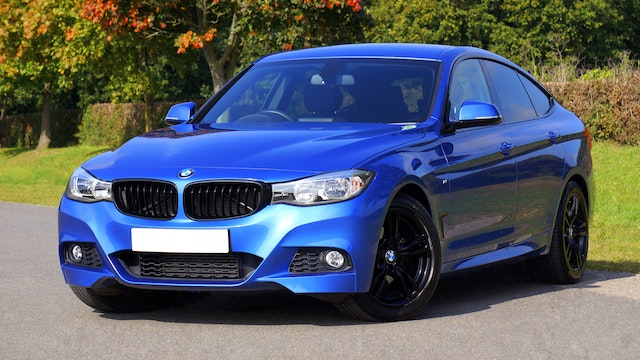

In [6]:
img = Image.open('car.jpg')

img

In [7]:
transforms = T.Compose([T.Resize(450),
                        T.ToTensor()])

In [8]:
img_tensor = transforms(img)

img_tensor

tensor([[[0.7686, 0.7294, 0.6588,  ..., 0.2667, 0.2275, 0.1216],
         [0.7490, 0.7020, 0.6275,  ..., 0.2275, 0.2000, 0.1255],
         [0.6863, 0.6431, 0.5882,  ..., 0.2353, 0.2392, 0.2000],
         ...,
         [0.6863, 0.6510, 0.6392,  ..., 0.6941, 0.7059, 0.7137],
         [0.7098, 0.6706, 0.6549,  ..., 0.7137, 0.7137, 0.7059],
         [0.6588, 0.6549, 0.6588,  ..., 0.7333, 0.7333, 0.7059]],

        [[0.4000, 0.3922, 0.3725,  ..., 0.3294, 0.2902, 0.1843],
         [0.3961, 0.3765, 0.3569,  ..., 0.2902, 0.2627, 0.1882],
         [0.3608, 0.3490, 0.3451,  ..., 0.2980, 0.3020, 0.2627],
         ...,
         [0.6431, 0.6078, 0.5961,  ..., 0.6392, 0.6510, 0.6588],
         [0.6667, 0.6275, 0.6118,  ..., 0.6627, 0.6588, 0.6510],
         [0.6157, 0.6118, 0.6157,  ..., 0.6784, 0.6784, 0.6510]],

        [[0.1490, 0.1255, 0.0824,  ..., 0.1725, 0.1373, 0.0314],
         [0.1333, 0.1020, 0.0588,  ..., 0.1373, 0.1098, 0.0353],
         [0.0824, 0.0588, 0.0392,  ..., 0.1490, 0.1529, 0.

In [9]:
img_tensor.shape

torch.Size([3, 450, 800])

In [10]:
img_tensor = img_tensor.unsqueeze(0)

img_tensor.shape

torch.Size([1, 3, 450, 800])

### Defining filter
* Convolution of an image with different filters can perform operations such as edge detection, blur and sharpen by applying filters.
* Filters for sharpen, edge detection , blurr and emboss operations are below.

In [11]:
sharpen_kernel = [[[[0, -1, 0]],
                   [[-1, 5, -1]],
                   [[0, -1, 0]]]]

In [12]:
sharpen_filter = torch.Tensor(sharpen_kernel)

sharpen_filter.shape

torch.Size([1, 3, 1, 3])

### Applying filter
* torch.nn.functional.conv2d accepts custom filters as opposed to torch.nn.conv2d which uses the default kernel
* F.conv2d requires a 4d tensor as input. Hence, the unsqueeze operation

In [13]:
conv_tensor = F.conv2d(img_tensor, sharpen_filter, padding=0)

conv_tensor.shape

torch.Size([1, 1, 450, 798])

In [14]:
conv_img = conv_tensor[0, :, :, :]

conv_img.shape

torch.Size([1, 450, 798])

In [15]:
conv_img = conv_img.numpy().squeeze()

conv_img.shape

(450, 798)

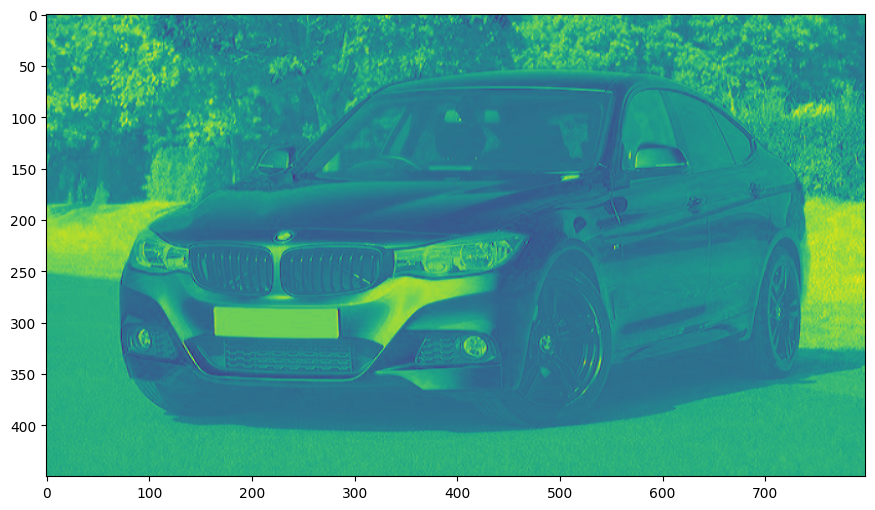

In [16]:
plt.figure(figsize = (12, 6))

plt.imshow(conv_img)

In [17]:
pool = nn.MaxPool2d(2, 2)

pool

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [18]:
pool_tensor = pool(conv_tensor)

pool_tensor.shape

torch.Size([1, 1, 225, 399])

In [19]:
pool_img = pool_tensor[0, :, :, :]

pool_img.shape

torch.Size([1, 225, 399])

In [20]:
pool_img = pool_img.numpy().squeeze()

pool_img.shape

(225, 399)

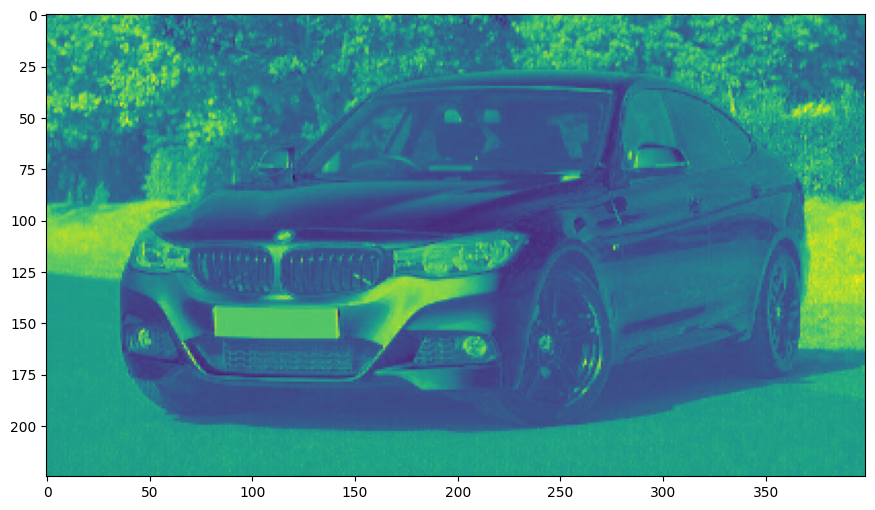

In [21]:
plt.figure(figsize = (12, 6))

plt.imshow(pool_img)

In [22]:
def apply_kernel_and_show(img_tensor, kernel):
  filter = torch.Tensor(kernel)

  conv_tensor = F.conv2d(img_tensor, filter, padding=0)

  conv_img = conv_tensor[0, :, :, :]
  conv_img = conv_img.numpy().squeeze()

  pool = nn.MaxPool2d(2, 2)

  pool_tensor = pool(conv_tensor)

  pool_img = pool_tensor[0, :, :, :]
  pool_img = pool_img.numpy().squeeze()

  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(16, 6)

  fig.suptitle('Convolutional output and Pooling output')

  ax1.imshow(conv_img)
  ax2.imshow(pool_img)

Both horizontal and vertical edge detection kernels which are known as Prewitt filters

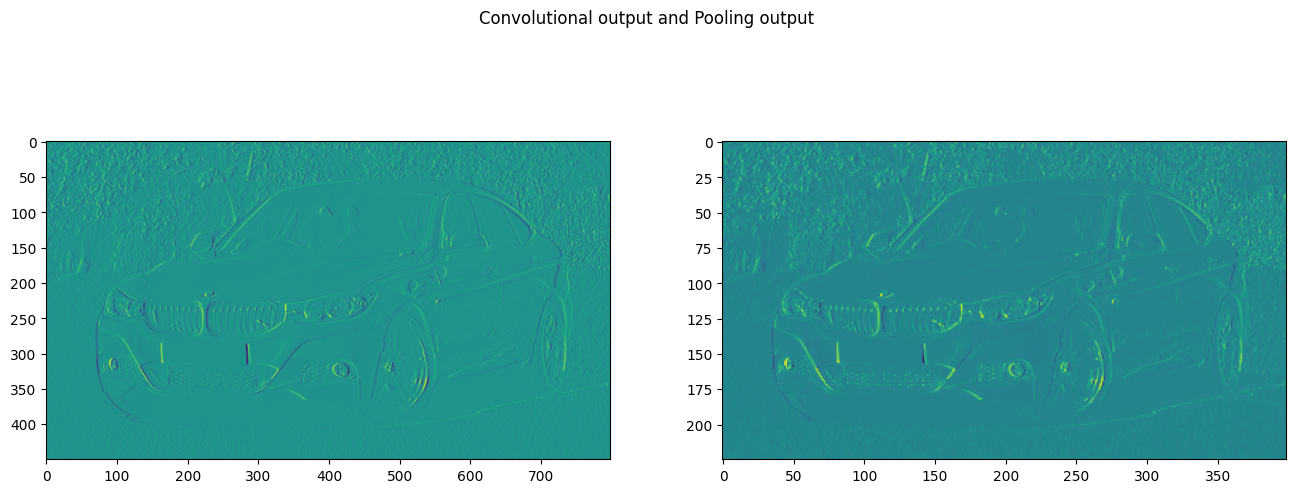

In [23]:
vertical_edge_kernel = [[[[-1, 0, 1]],
                       [[-1, 0, 1]],
                       [[-1, 0, 1]]]]

apply_kernel_and_show(img_tensor, vertical_edge_kernel)

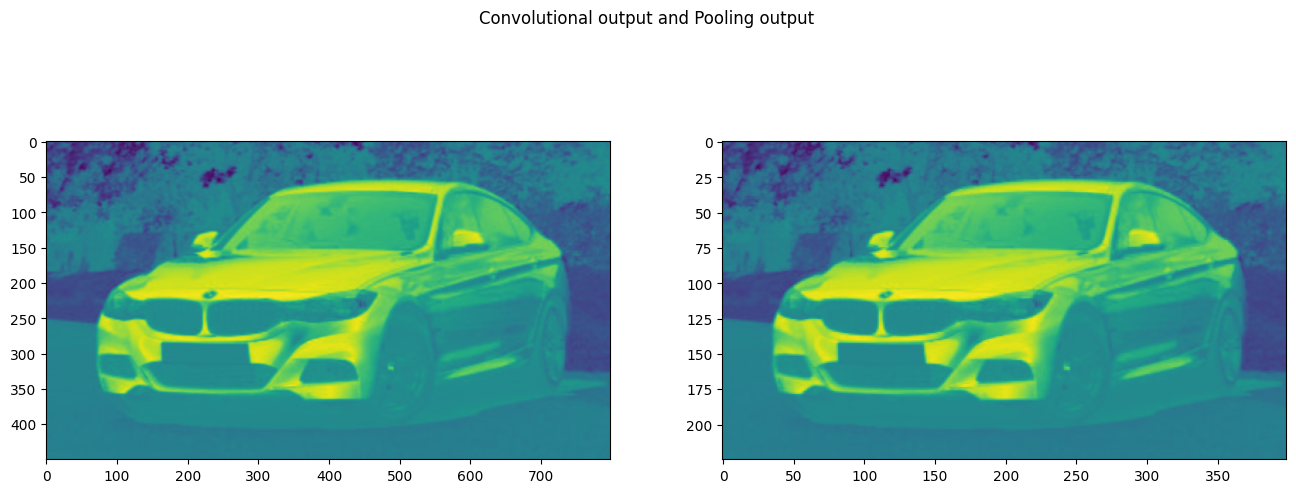

In [24]:
horizontal_edge_kernel = [[[[-1, -1, -1]],
                           [[0, 0, 0]],
                           [[1, 1, 1]]]]

apply_kernel_and_show(img_tensor, horizontal_edge_kernel)

Below are horizontal and vertical edge detection kernels which are known as Sobel filters

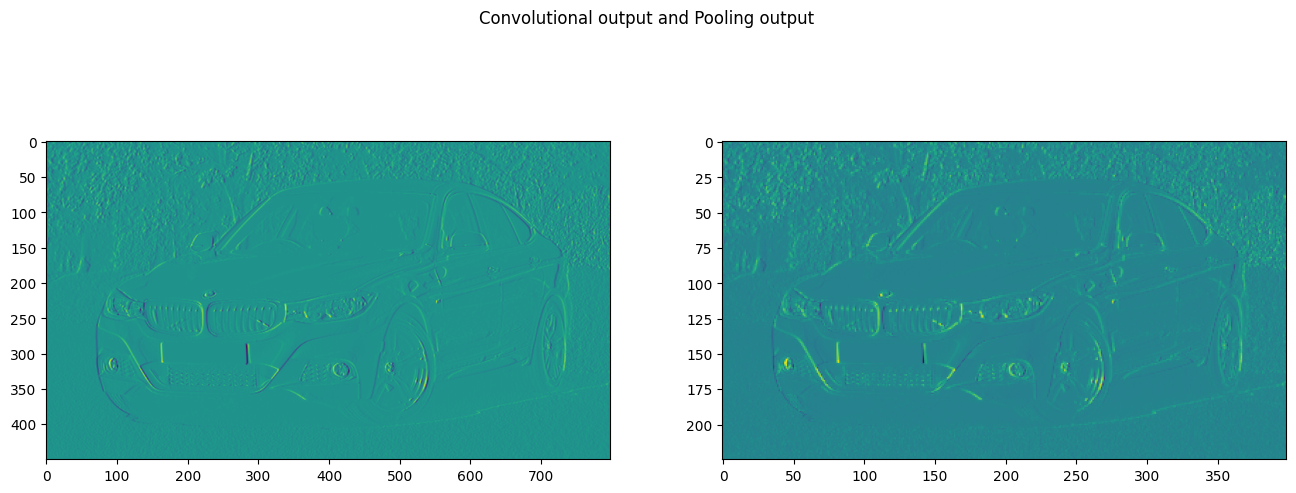

In [25]:
vertical_edge_kernel = [[[[-1, 0, 1]],
                         [[-2, 0, 2]],
                         [[-1, 0, 1]]]]

apply_kernel_and_show(img_tensor, vertical_edge_kernel)

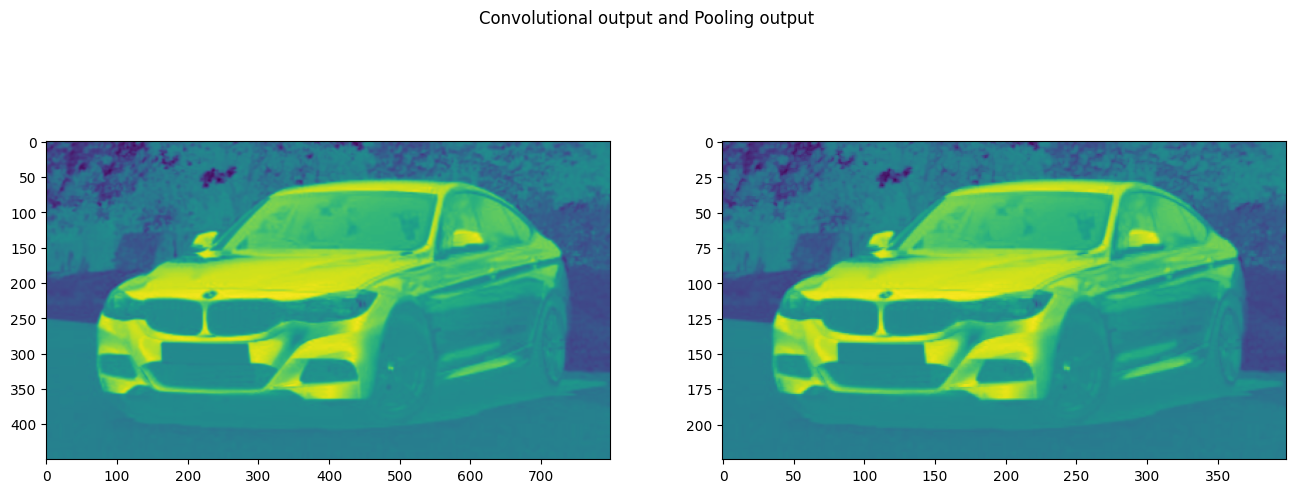

In [26]:
horizontal_edge_kernel = [[[[-1, -2, -1]],
                           [[0, 0, 0]],
                           [[1, 2, 1]]]]

apply_kernel_and_show(img_tensor, horizontal_edge_kernel)

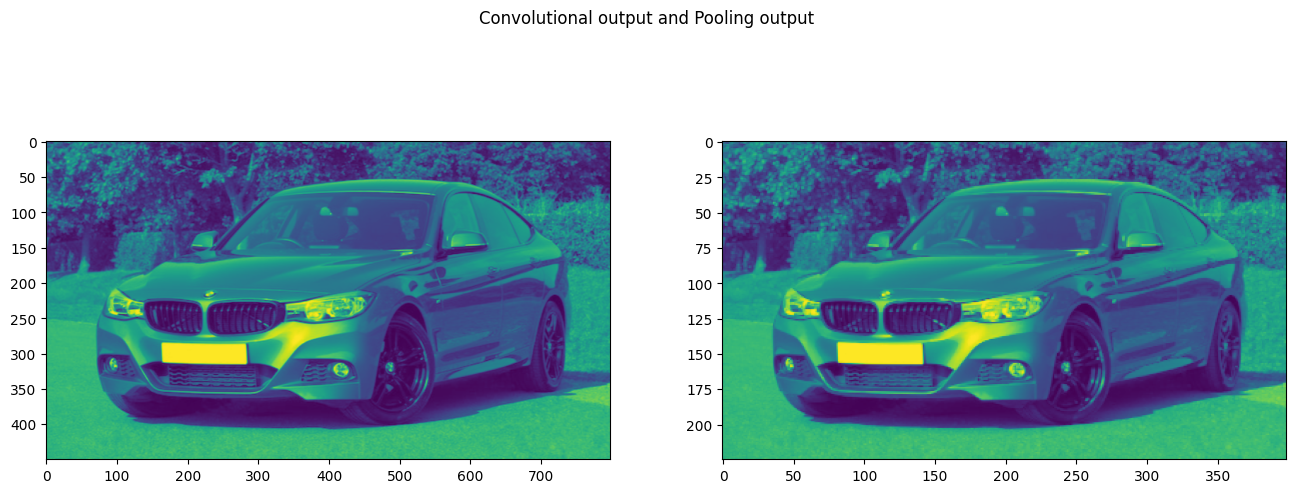

In [27]:
gaussian_blur_kernel = [[[[1/16, 1/8, 1/16]],
                           [[1/8, 1/4, 1/8]],
                           [[1/16, 1/8, 1/16]]]]

apply_kernel_and_show(img_tensor, gaussian_blur_kernel)

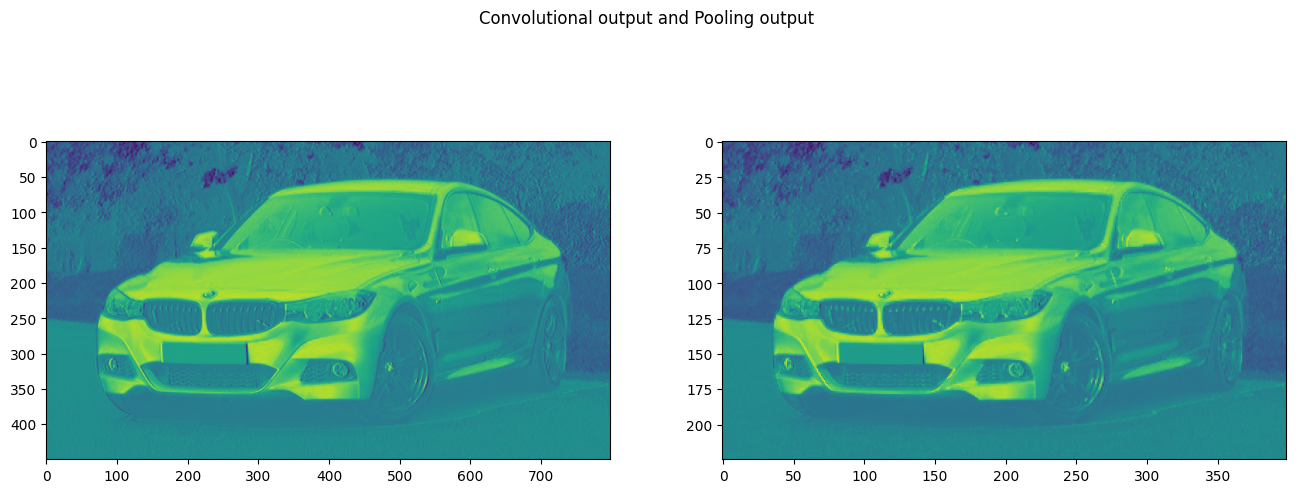

In [28]:
emboss_kernel = [[[[-2, -1, 0]],
                  [[-1, 1, 1]],
                  [[0, 1, 2]]]]

apply_kernel_and_show(img_tensor, emboss_kernel)